In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:

xtrain=pd.read_table('/Users/bomiao/Desktop/256Proj/UCIHARDataset/train/X_train.txt',delim_whitespace=True,header=None)
ytrain=pd.read_table('/Users/bomiao/Desktop/256Proj/UCIHARDataset/train/y_train.txt',header=None)

In [44]:
xtest=pd.read_table('/Users/bomiao/Desktop/256Proj/UCIHARDataset/test/X_test.txt',delim_whitespace=True,header=None)
ytest=pd.read_table('/Users/bomiao/Desktop/256Proj/UCIHARDataset/test/y_test.txt',header=None)

In [45]:
#converting into array
xtrain=xtrain.values 
xtest=xtest.values
ytrain=ytrain.values
ytest=ytest.values

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [47]:
knn = KNeighborsClassifier(n_neighbors = 24) #setting k= square root of 561

In [48]:
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

/Users/bomiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [49]:
print (str(accuracy_score(ytest,ypred)*100) + '%')

90.22734984730234%


In [50]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)

from sklearn.decomposition import PCA

# pca = PCA(n_components=200)

# X_train_scaled = pca.fit_transform(X_train_scaled, ytrain)
# print(pca.explained_variance_ratio_.sum())
# X_test_scaled = pca.transform(X_test_scaled)

x_list, y_list = [], []
for i in range(1, 561, 10):
    x_list.append(i)
    
    pca = PCA(n_components=i)
    temp = pca.fit_transform(X_train_scaled, ytrain)
    y = pca.explained_variance_ratio_.sum()
    y_list.append(y)


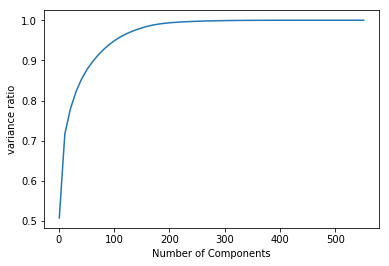

In [51]:
plt.xlabel('Number of Components')
plt.ylabel('variance ratio')
plt.plot(x_list, y_list)


In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)

X_train_scaled = pca.fit_transform(X_train_scaled, ytrain)
print(pca.explained_variance_ratio_.sum())
X_test_scaled = pca.transform(X_test_scaled)

0.9936051026649753


In [31]:
#Finding the optimal model by varying the no. of neighbors
scores = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
#     knn.fit(xtrain, ytrain)
#     ypred = knn.predict(xtest)
    knn.fit(X_train_scaled, ytrain)
    ypred = knn.predict(X_test_scaled)
    scores.append(accuracy_score(ytest,ypred))

/Users/bomiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/bomiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/bomiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/bomiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/bomiao/an

/Users/bomiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/bomiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/bomiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/bomiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/Users/bomiao/an

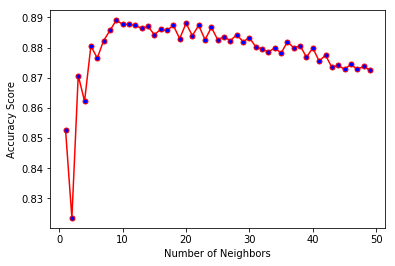

In [32]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=5)

In [33]:
scores = np.array(scores)

In [53]:
#Final result after training the model
print ('Optimal No. Of Neighbors: ', scores.argmax()+1)
print ('Accuracy Score: '+ str(scores.max()*100)+ '%')

Optimal No. Of Neighbors:  9
Accuracy Score: 88.90397013912454%


In [54]:
knn = KNeighborsClassifier(n_neighbors = 9, n_jobs = -1)
knn.fit(X_train_scaled, ytrain)
ypred = knn.predict(X_test_scaled)

ypred

/Users/bomiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([5, 5, 5, ..., 2, 2, 1])

In [55]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

print (confusion_matrix(ytest,ypred))
print (classification_report(ytest,ypred))

[[486   3   7   0   0   0]
 [ 47 422   2   0   0   0]
 [ 55  54 311   0   0   0]
 [  0   2   0 385 101   3]
 [  0   0   0  28 504   0]
 [  0   0   0  16  12 509]]
             precision    recall  f1-score   support

          1       0.83      0.98      0.90       496
          2       0.88      0.90      0.89       471
          3       0.97      0.74      0.84       420
          4       0.90      0.78      0.84       491
          5       0.82      0.95      0.88       532
          6       0.99      0.95      0.97       537

avg / total       0.90      0.89      0.89      2947

